### EDA

In [1]:
import pandas as pd

In [2]:
final_combined_data_cleaned = pd.read_excel('6. final_dataset.xlsx')

##### Descriptive Statistics: Get the summary statistics (mean, std, min, max, etc.) for numerical columns to understand the central tendency and spread.

In [3]:
final_combined_data_cleaned.describe()

,year,pH,EC,Phosphorus,Potassium,OM,Urea1,Urea2,Urea3,Urea4,...,sunshine_duration,rain_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration_sum,Yield,Sown
count,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,...,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.0
mean,2018.999810,5.635805,0.098332,15.964957,105.829481,3.396024,7.058617,12.663448,10.411375,5.906555,...,34197.199533,1116.408963,1561.725331,16.426490,37.498784,182.211909,3412.442462,729.410632,3651.885028,1.0
std,2.581915,1.056754,0.107890,17.189961,75.371909,3.186679,4.355157,7.162423,5.978502,3.189126,...,1952.344023,484.582833,680.266910,4.324140,6.793477,53.259205,216.003701,96.498502,735.749061,0.0
min,2015.000000,3.000000,0.001000,0.000000,0.100000,0.010000,0.048000,0.084000,0.070000,0.048000,...,26952.864153,141.900000,286.000000,7.441530,23.879670,58.666667,2795.310000,505.690000,1757.875000,1.0
25%,2017.000000,4.800000,0.040000,6.300000,53.000000,1.600000,4.280000,7.176000,5.950000,3.944000,...,32975.177104,797.300000,1095.000000,13.599454,32.596154,126.851648,3264.830000,672.770000,3093.796969,1.0
50%,2019.000000,5.400000,0.070000,11.300000,84.500000,2.500000,6.475000,12.804000,10.406000,5.656000,...,34095.727650,1074.000000,1407.000000,15.763934,36.817582,200.202186,3394.850000,707.207500,3565.853881,1.0
75%,2021.000000,6.500000,0.120000,18.200000,137.000000,4.000000,9.260000,18.216000,14.720000,8.208000,...,35572.449945,1422.650000,1906.500000,18.538798,42.091257,219.065574,3546.130000,754.960000,4156.499935,1.0
max,2023.000000,9.900000,1.635000,151.950000,534.000000,29.050000,20.000000,30.000000,26.000000,14.000000,...,39027.778251,3336.500000,3446.000000,29.768852,59.251913,280.879781,4024.710000,1085.700000,6073.440987,1.0


##### Checking for Missing Values: Ensure there are no missing values in the dataset.

In [4]:
final_combined_data_cleaned.isnull().sum()

year                              0
District                          0
season                            0
Condition                         0
pH                                0
EC                                0
Phosphorus                        0
Potassium                         0
OM                                0
Urea1                             0
Urea2                             0
Urea3                             0
Urea4                             0
TSP0                              0
MOP1                              0
MOP2                              0
MOP3                              0
temperature_2m_max                0
temperature_2m_min                0
temperature_2m_mean               0
daylight_duration                 0
sunshine_duration                 0
rain_sum                          0
precipitation_hours               0
wind_speed_10m_max                0
wind_gusts_10m_max                0
wind_direction_10m_dominant       0
shortwave_radiation_sum     

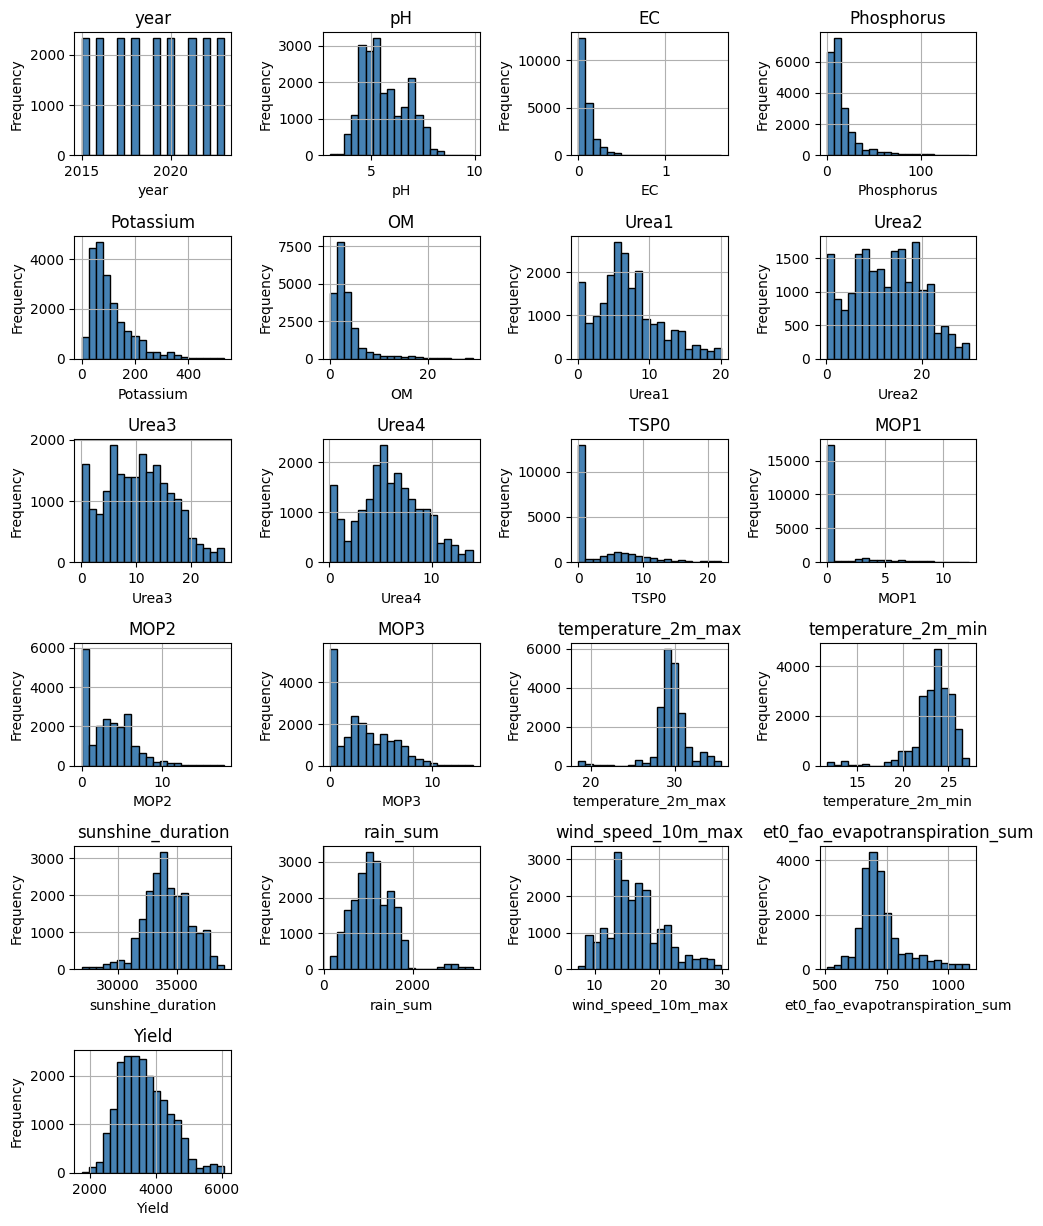

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def showdist():
    numerical_columns = final_combined_data_cleaned.select_dtypes(include=[float, int])
    plt.figure(figsize=(10, 16))
    for i, col in enumerate(numerical_columns):
        plt.subplot(8, 4, i + 1)  # Fixed grid of 3x3
        final_combined_data_cleaned[col].hist(bins=20, color='steelblue', edgecolor='black')
        plt.title(f'{col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


final_combined_data_cleaned = final_combined_data_cleaned.drop(['wind_direction_10m_dominant','wind_gusts_10m_max','precipitation_hours','daylight_duration','shortwave_radiation_sum', 'temperature_2m_mean', 'Sown'], axis=1)

showdist()

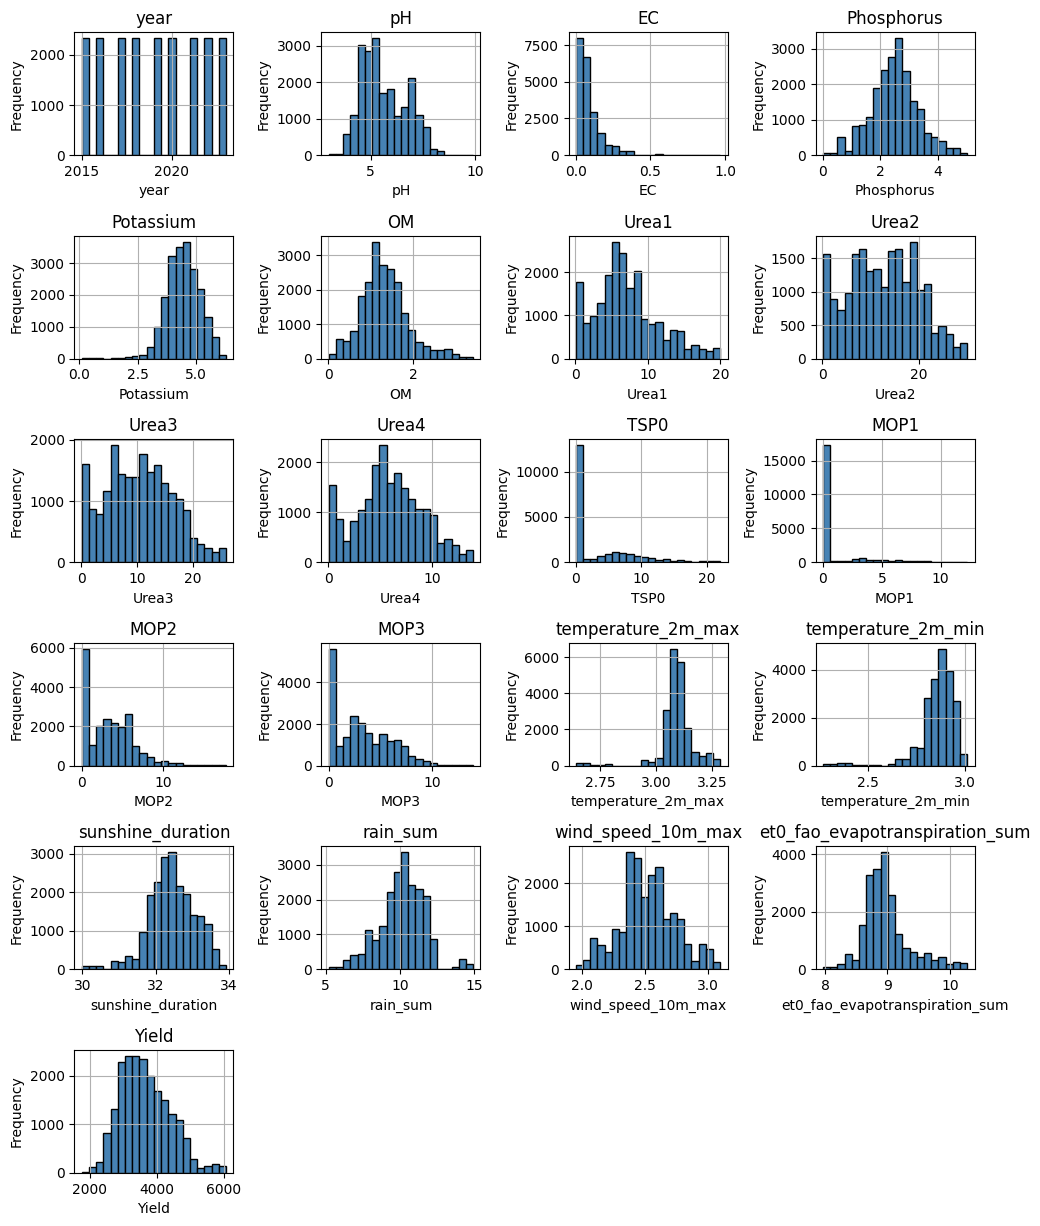

In [6]:
import numpy as np 

final_combined_data_cleaned['Phosphorus'] = np.log1p(final_combined_data_cleaned['Phosphorus'])
final_combined_data_cleaned['Potassium'] = np.log1p(final_combined_data_cleaned['Potassium'])
final_combined_data_cleaned['OM'] = np.log1p(final_combined_data_cleaned['OM'])
final_combined_data_cleaned['EC'] = np.log1p(final_combined_data_cleaned['EC'])
final_combined_data_cleaned['temperature_2m_max'] = np.cbrt(final_combined_data_cleaned['temperature_2m_max'])
final_combined_data_cleaned['temperature_2m_min'] = np.cbrt(final_combined_data_cleaned['temperature_2m_min'])
final_combined_data_cleaned['rain_sum'] = np.cbrt(final_combined_data_cleaned['rain_sum'])
final_combined_data_cleaned['sunshine_duration'] = np.cbrt(final_combined_data_cleaned['sunshine_duration'])
final_combined_data_cleaned['wind_speed_10m_max'] = np.cbrt(final_combined_data_cleaned['wind_speed_10m_max'])
final_combined_data_cleaned['et0_fao_evapotranspiration_sum'] = np.cbrt(final_combined_data_cleaned['et0_fao_evapotranspiration_sum'])

showdist()


In [7]:
# numerical_columns = final_combined_data_cleaned.select_dtypes(include=[float, int])

# plt.figure(figsize=(10, 16))
# for i, col in enumerate(numerical_columns):
#     plt.subplot(8, 4, i + 1)  
#     sns.boxplot(y=final_combined_data_cleaned[col], color='lightblue')
#     plt.title(f'{col} Boxplot')
# plt.tight_layout()
# plt.show()

##### Distribution of Target Variable (Yield): Plot the distribution of the target variable (Yield) to understand its skewness or potential outliers

### Corela

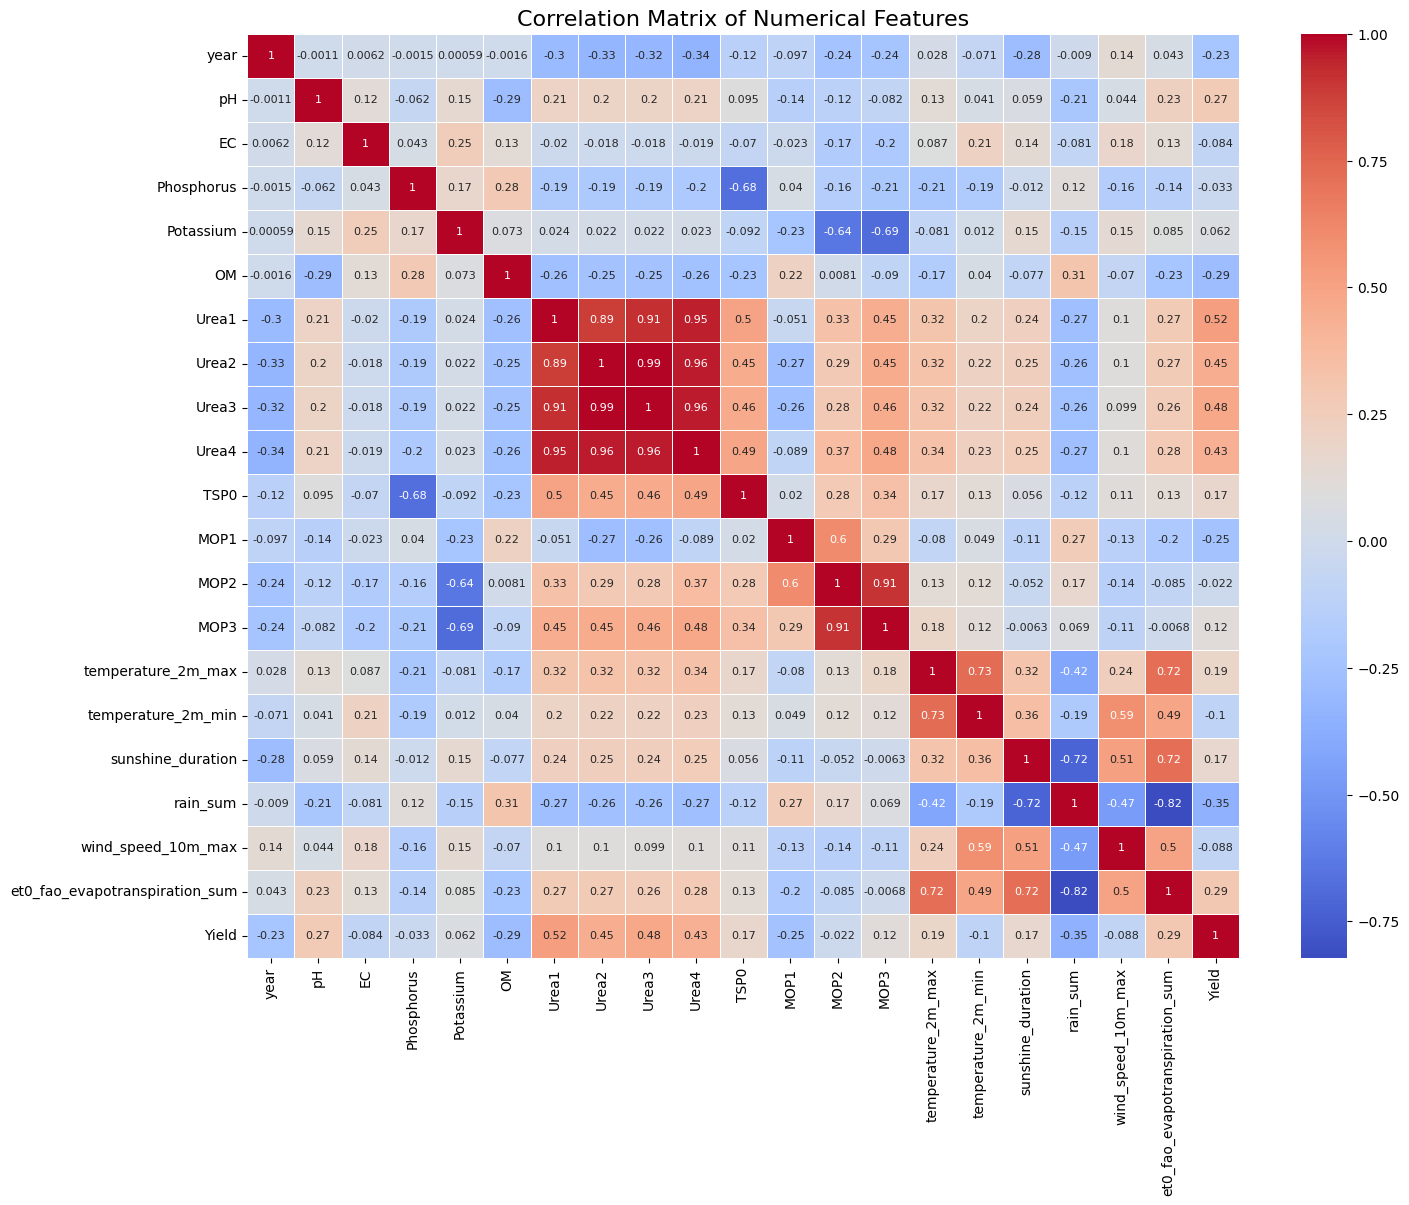

In [8]:
import numpy as np

# Selecting only the numeric columns
numeric_data = final_combined_data_cleaned.select_dtypes(include=[np.number])

# Now calculate the correlation matrix
correlation_matrix = numeric_data.corr()
import seaborn as sns
import matplotlib.pyplot as plt

# Re-generate the heatmap with improved clarity
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [9]:
# final_combined_data_cleaned.groupby(['year', 'season'])['Yield'].mean().plot(kind='line', title='Average Yield Over Seasons')

### Experimenting with multiple hidden layers and perceptrons

Training model with layers configuration: [4]


d:\Projects\CDP\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7940 - mean_absolute_error: 0.6890 - val_loss: 0.4571 - val_mean_absolute_error: 0.5090 - learning_rate: 0.0100
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5391 - mean_absolute_error: 0.5602 - val_loss: 0.4112 - val_mean_absolute_error: 0.4810 - learning_rate: 0.0100
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4967 - mean_absolute_error: 0.5335 - val_loss: 0.3884 - val_mean_absolute_error: 0.4622 - learning_rate: 0.0100
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4640 - mean_absolute_error: 0.5180 - val_loss: 0.3773 - val_mean_absolute_error: 0.4571 - learning_rate: 0.0100
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4576 - mean_absolute_error: 0.5095 - val_loss: 0.3542 - val_mean_absolute_error: 0.4447 - learning_rate: 0.0100
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4495 - mean_absolute_error: 0.5068 - val_loss: 0.3421 - val_me

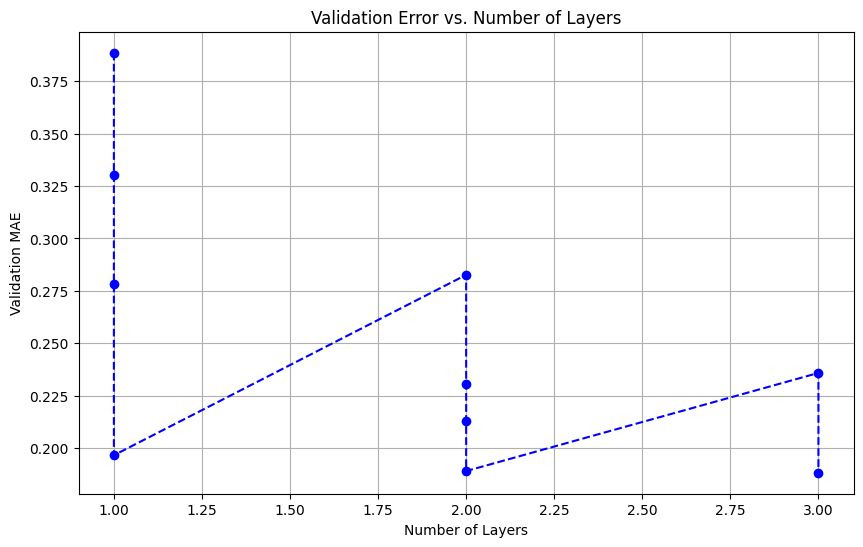

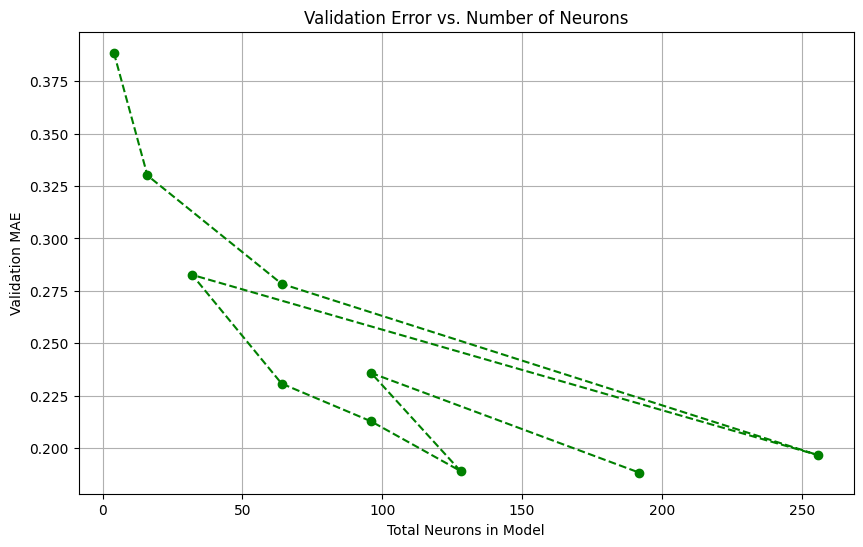

In [10]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Loading and preprocessing data
final_combined_data_cleaned = pd.read_excel('6. final_dataset.xlsx')
# Data transformation steps...
final_combined_data_cleaned['Phosphorus'] = np.log1p(final_combined_data_cleaned['Phosphorus'])
final_combined_data_cleaned['Potassium'] = np.log1p(final_combined_data_cleaned['Potassium'])
final_combined_data_cleaned['OM'] = np.log1p(final_combined_data_cleaned['OM'])
final_combined_data_cleaned['EC'] = np.log1p(final_combined_data_cleaned['EC'])
# Other transformations...

label_encoder = LabelEncoder()
final_combined_data_cleaned['Season'] = label_encoder.fit_transform(final_combined_data_cleaned['season'])
final_combined_data_encoded = pd.get_dummies(final_combined_data_cleaned, columns=['Condition'])

features = ['year', 'pH', 'EC', 'Phosphorus', 'Potassium', 'OM', 
            'Urea1', 'Urea2', 'Urea3', 'Urea4', 
            'TSP0', 'MOP1', 'MOP2', 'MOP3', 
            'temperature_2m_max', 'temperature_2m_min', 
            'sunshine_duration', 'rain_sum', 
            'wind_speed_10m_max', 
            'et0_fao_evapotranspiration_sum', 
            'Season']

features.extend([col for col in final_combined_data_encoded.columns if col.startswith('Condition_')]) 
X = final_combined_data_encoded[features]
y = final_combined_data_encoded['Yield']

# Scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Define model building function
def build_model(layers_config, input_dim):
    model = Sequential()
    for i, neurons in enumerate(layers_config):
        if i == 0:
            model.add(Dense(neurons, input_dim=input_dim, activation='relu'))
        else:
            model.add(Dense(neurons, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
    model.add(Dense(1))  
    return model

# Different configurations to test
configs = [
    [4],              # 1 layer, 4 neurons
    [16],             # 1 layer, 16 neurons
    [64],             # 1 layer, 64 neurons
    [256],            # 1 layer, 256 neurons
    [16, 16],         # 2 layers, 16 neurons each
    [32, 32],         # 2 layers, 64 neurons each
    [48, 48],         # 2 layers, 16 neurons each
    [64, 64],
    [32, 32, 32], 
    [64, 64, 64],     # 3 layers, 64 neurons each
]

# Initialize list to store results
results = []

# Function to compile, train, and evaluate a model
def train_model(layers_config):
    model = build_model(layers_config, X_train.shape[1])
    model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error', metrics=['mean_absolute_error'])
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7)

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=32, verbose=1,
                        callbacks=[early_stopping, reduce_lr])

    # Get the best validation MAE
    min_val_mae = min(history.history['val_mean_absolute_error'])
    return min_val_mae

# Train models and store errors
for config in configs:
    print(f"Training model with layers configuration: {config}")
    val_mae = train_model(config)
    results.append({'config': config, 'num_layers': len(config), 'neurons_per_layer': sum(config), 'val_mae': val_mae})

# Plot number of layers vs validation error
plt.figure(figsize=(10, 6))
layer_counts = [result['num_layers'] for result in results]
maes = [result['val_mae'] for result in results]
plt.plot(layer_counts, maes, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Layers')
plt.ylabel('Validation MAE')
plt.title('Validation Error vs. Number of Layers')
plt.grid(True)
plt.show()

# Optional: Plot neurons vs validation error
plt.figure(figsize=(10, 6))
neurons_counts = [result['neurons_per_layer'] for result in results]
plt.plot(neurons_counts, maes, marker='o', linestyle='--', color='g')
plt.xlabel('Total Neurons in Model')
plt.ylabel('Validation MAE')
plt.title('Validation Error vs. Number of Neurons')
plt.grid(True)
plt.show()


d:\Projects\CDP\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


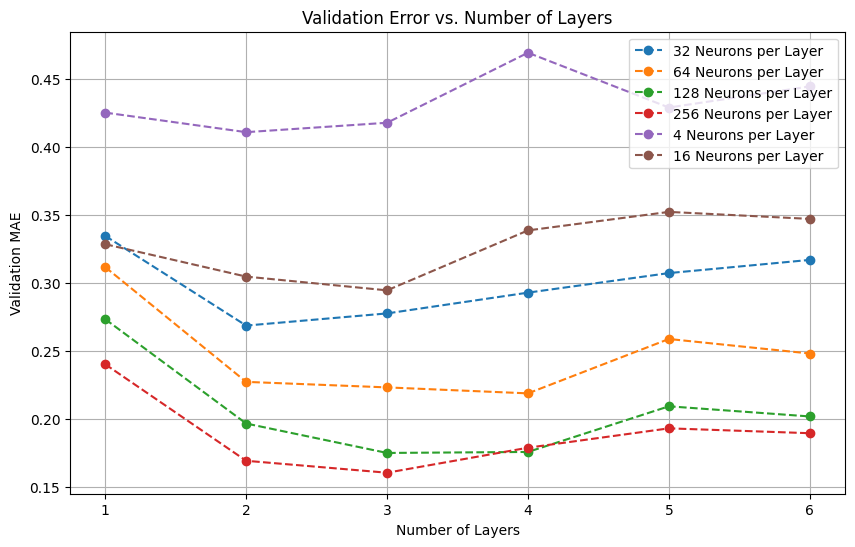

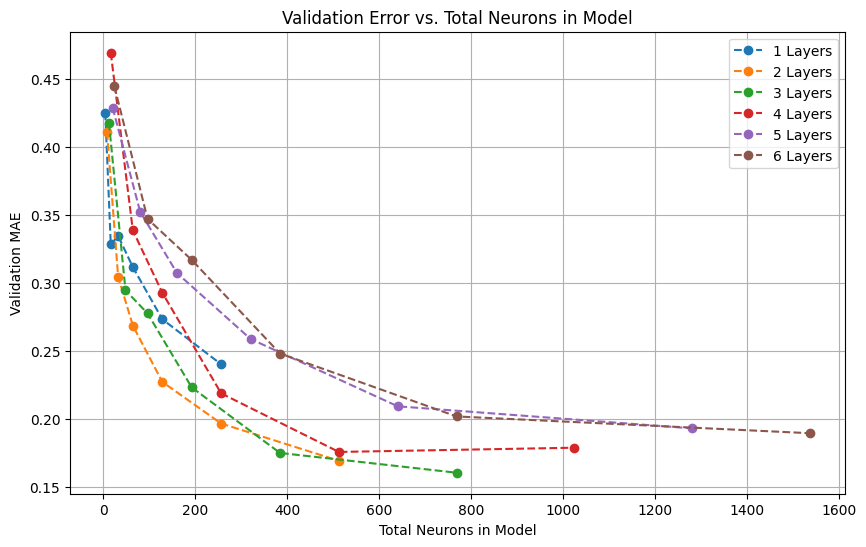

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

final_combined_data_cleaned = pd.read_excel('6. final_dataset.xlsx')
final_combined_data_cleaned['Phosphorus'] = np.log1p(final_combined_data_cleaned['Phosphorus'])
final_combined_data_cleaned['Potassium'] = np.log1p(final_combined_data_cleaned['Potassium'])
final_combined_data_cleaned['OM'] = np.log1p(final_combined_data_cleaned['OM'])
final_combined_data_cleaned['EC'] = np.log1p(final_combined_data_cleaned['EC'])

label_encoder = LabelEncoder()
final_combined_data_cleaned['Season'] = label_encoder.fit_transform(final_combined_data_cleaned['season'])
final_combined_data_encoded = pd.get_dummies(final_combined_data_cleaned, columns=['Condition'])

features = ['year', 'pH', 'EC', 'Phosphorus', 'Potassium', 'OM', 
            'Urea1', 'Urea2', 'Urea3', 'Urea4', 'TSP0', 'MOP1', 'MOP2', 'MOP3',
            'temperature_2m_max', 'temperature_2m_min', 'sunshine_duration', 'rain_sum',
            'wind_speed_10m_max', 'et0_fao_evapotranspiration_sum', 'Season']
features.extend([col for col in final_combined_data_encoded.columns if col.startswith('Condition_')])
X = final_combined_data_encoded[features]
y = final_combined_data_encoded['Yield']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Function to build the model
def build_model(layers_config, input_dim):
    model = Sequential()
    for i, neurons in enumerate(layers_config):
        if i == 0:
            model.add(Dense(neurons, input_dim=input_dim, activation='relu'))
        else:
            model.add(Dense(neurons, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
    model.add(Dense(1))  
    return model

layer_configs = [[4], [16], [32], [64], [128], [256]]  
layer_counts = [1, 2, 3, 4, 5, 6]  

results = []

for layer_config in layer_configs:
    for count in layer_counts:
        config = layer_config * count 
        model = build_model(config, X_train.shape[1])
        model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error', metrics=['mean_absolute_error'])
        
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7)

        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=0,
                            callbacks=[early_stopping, reduce_lr])

        min_val_mae = min(history.history['val_mean_absolute_error'])
        results.append({
            'config': config,
            'num_layers': count,
            'neurons_per_layer': config[0],
            'val_mae': min_val_mae
        })

plt.figure(figsize=(10, 6))
for neurons in set([result['neurons_per_layer'] for result in results]):
    filtered_results = [result for result in results if result['neurons_per_layer'] == neurons]
    layer_counts = [result['num_layers'] for result in filtered_results]
    val_maes = [result['val_mae'] for result in filtered_results]
    plt.plot(layer_counts, val_maes, marker='o', linestyle='--', label=f'{neurons} Neurons per Layer')

plt.xlabel('Number of Layers')
plt.ylabel('Validation MAE')
plt.title('Validation Error vs. Number of Layers')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
for layers in set([result['num_layers'] for result in results]):
    filtered_results = [result for result in results if result['num_layers'] == layers]
    total_neurons = [result['neurons_per_layer'] * result['num_layers'] for result in filtered_results]
    val_maes = [result['val_mae'] for result in filtered_results]
    plt.plot(total_neurons, val_maes, marker='o', linestyle='--', label=f'{layers} Layers')

plt.xlabel('Total Neurons in Model')
plt.ylabel('Validation MAE')
plt.title('Validation Error vs. Total Neurons in Model')
plt.legend()
plt.grid(True)
plt.show()